In [22]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
#DataFrame
df = pd.read_excel("/Users/hoangvupham/Desktop/KHDL mar/Online_Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
# Chuyển đổi cột 'InvoiceDate' sang dạng datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Lọc dữ liệu từ tháng 5 đến tháng 9 (bao gồm cả hai tháng)
df = df[df['InvoiceDate'].dt.month.between(5, 9)]

# Hiển thị vài dòng đầu của dataframe đã lọc
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
171999,551515,21731,RED TOADSTOOL LED NIGHT LIGHT,12,2011-05-01 10:51:00,1.65,15606.0,United Kingdom
172000,551515,20749,ASSORTED COLOUR MINI CASES,12,2011-05-01 10:51:00,6.35,15606.0,United Kingdom
172001,551515,22729,ALARM CLOCK BAKELIKE ORANGE,8,2011-05-01 10:51:00,3.75,15606.0,United Kingdom
172002,551515,22998,TRAVEL CARD WALLET KEEP CALM,24,2011-05-01 10:51:00,0.42,15606.0,United Kingdom
172003,551515,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,24,2011-05-01 10:51:00,2.55,15606.0,United Kingdom


In [25]:
#Lọc các dữ liệu Quantity và UnitPrice 
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]

In [26]:
#Kiểm tra dòng đầu và dòng cuối của df mới để kiểm tra thời gian
first_row = df.head(1)
last_row = df.tail(1)

first_row, last_row

(       InvoiceNo StockCode                    Description  Quantity  \
 171999    551515     21731  RED TOADSTOOL LED NIGHT LIGHT        12   
 
                InvoiceDate  UnitPrice  CustomerID         Country  
 171999 2011-05-01 10:51:00       1.65     15606.0  United Kingdom  ,
        InvoiceNo StockCode                         Description  Quantity  \
 370930    569202     22805  BLUE DRAWER KNOB ACRYLIC EDWARDIAN        10   
 
                InvoiceDate  UnitPrice  CustomerID         Country  
 370930 2011-09-30 17:22:00       1.25         NaN  United Kingdom  )

In [27]:
#Kiểm tra số lượng CustomerID bị NaN
df['CustomerID'].isna().sum()
df.loc[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
172451,551536,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-05-03 08:35:00,2.95,NaN,United Kingdom
172452,551536,85129D,BEADED CRYSTAL HEART PINK SMALL,1,2011-05-03 08:35:00,1.25,NaN,United Kingdom
172453,551537,21499,BLUE POLKADOT WRAP,2,2011-05-03 08:37:00,0.42,NaN,United Kingdom
172454,551537,21086,SET/6 RED SPOTTY PAPER CUPS,2,2011-05-03 08:37:00,0.65,NaN,United Kingdom
172455,551537,21094,SET/6 RED SPOTTY PAPER PLATES,2,2011-05-03 08:37:00,0.85,NaN,United Kingdom


In [28]:
#Loại bỏ CustomerID bị NaN
df = df.dropna(subset=['CustomerID'])
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149365 entries, 171999 to 370679
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    149365 non-null  object        
 1   StockCode    149365 non-null  object        
 2   Description  149365 non-null  object        
 3   Quantity     149365 non-null  int64         
 4   InvoiceDate  149365 non-null  datetime64[ns]
 5   UnitPrice    149365 non-null  float64       
 6   CustomerID   149365 non-null  float64       
 7   Country      149365 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 10.3+ MB


In [29]:
#Lưu df sau khi xử lý dưới dang csv
df.to_csv("/Users/hoangvupham/Desktop/KHDL mar/Data_G5_Cleaned.csv")

In [31]:
df = pd.read_csv("/Users/hoangvupham/Desktop/KHDL mar/Data_G5_Cleaned.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,551515,21731,RED TOADSTOOL LED NIGHT LIGHT,12,2011-05-01 10:51:00,1.65,15606.0,United Kingdom
1,551515,20749,ASSORTED COLOUR MINI CASES,12,2011-05-01 10:51:00,6.35,15606.0,United Kingdom
2,551515,22729,ALARM CLOCK BAKELIKE ORANGE,8,2011-05-01 10:51:00,3.75,15606.0,United Kingdom
3,551515,22998,TRAVEL CARD WALLET KEEP CALM,24,2011-05-01 10:51:00,0.42,15606.0,United Kingdom
4,551515,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,24,2011-05-01 10:51:00,2.55,15606.0,United Kingdom


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149365 entries, 0 to 149364
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    149365 non-null  int64  
 1   StockCode    149365 non-null  object 
 2   Description  149365 non-null  object 
 3   Quantity     149365 non-null  int64  
 4   InvoiceDate  149365 non-null  object 
 5   UnitPrice    149365 non-null  float64
 6   CustomerID   149365 non-null  float64
 7   Country      149365 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 9.1+ MB


In [33]:
sns.set(style="whitegrid")

In [35]:
#Tạo cột tổng tiền cho mỗi dòng
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]

In [36]:
#1.Top sản phẩm bán chạy
top_products = (
    df.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 sản phẩm bán chạy nhất:\n", top_products)

Top 10 sản phẩm bán chạy nhất:
 Description
JUMBO BAG RED RETROSPOT               19424
WORLD WAR 2 GLIDERS ASSTD DESIGNS     16182
ASSORTED COLOUR BIRD ORNAMENT         15764
PACK OF 72 RETROSPOT CAKE CASES       13736
WHITE HANGING HEART T-LIGHT HOLDER    12925
PACK OF 60 PINK PAISLEY CAKE CASES    12273
ASSORTED COLOURS SILK FAN             12024
POPCORN HOLDER                        11467
BROCADE RING PURSE                    10635
MINI PAINT SET VINTAGE                10049
Name: Quantity, dtype: int64


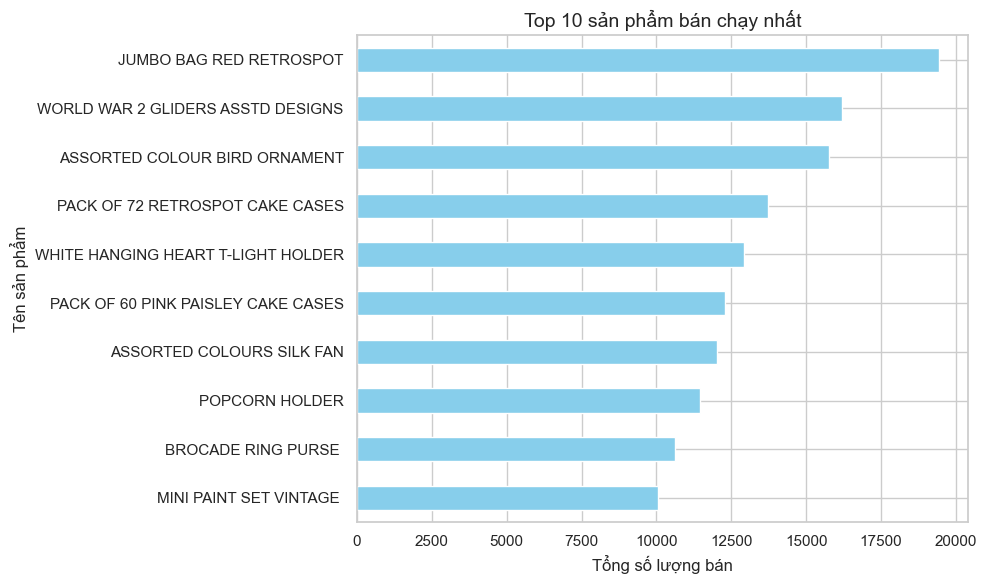

In [37]:
# ----- 1. Biểu đồ: Top 10 sản phẩm bán chạy -----
plt.figure(figsize=(10, 6))
top_products.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 sản phẩm bán chạy nhất", fontsize=14)
plt.xlabel("Tổng số lượng bán")
plt.ylabel("Tên sản phẩm")
plt.tight_layout()
plt.show()

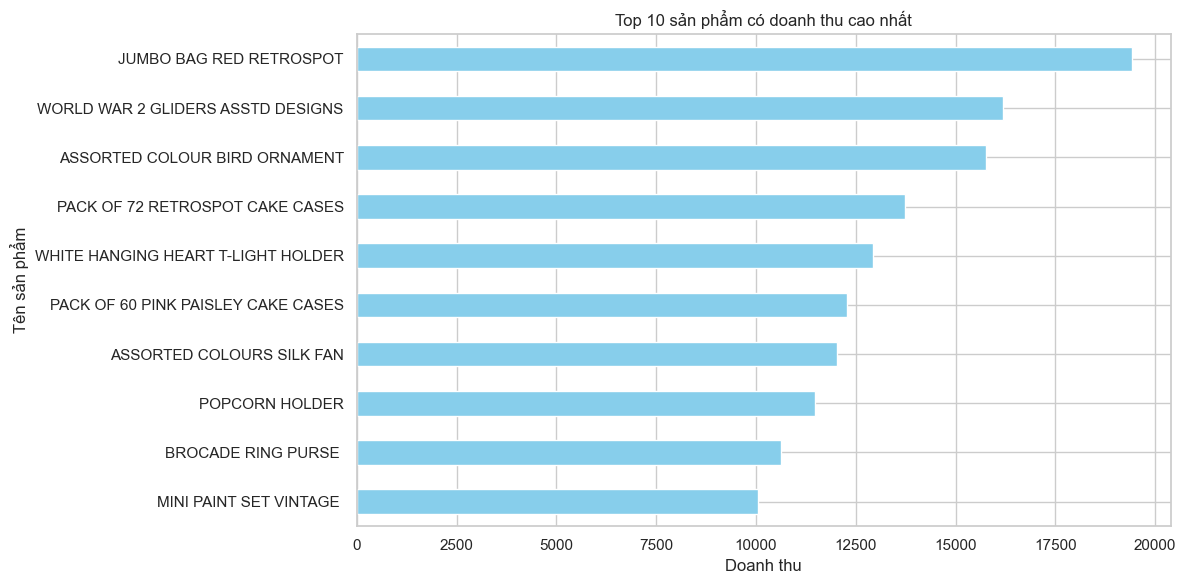

In [38]:
# Tính tổng doanh thu theo từng sản phẩm
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

# Biểu đồ doanh thu top 10 sản phẩm
op_products = product_revenue.head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # Để sản phẩm doanh thu cao nhất ở trên
plt.xlabel("Doanh thu")
plt.ylabel("Tên sản phẩm")
plt.title("Top 10 sản phẩm có doanh thu cao nhất")
plt.tight_layout()
plt.show()

In [39]:
#2.Tần suất mua hàng trung bình
#Một đơn hàng duy nhất = mỗi InvoiceNo và CustomerID
orders_per_customer = df.drop_duplicates(subset=["InvoiceNo", "CustomerID"])
frequency = (
    orders_per_customer.groupby("CustomerID")["InvoiceNo"]
    .count()
    .mean()
)
print(f"\nTần suất mua hàng trung bình: {frequency:.2f} đơn hàng / khách")


Tần suất mua hàng trung bình: 2.66 đơn hàng / khách


In [40]:
#3. Giá trị đơn hàng trung bình
avg_order_value = df.groupby("InvoiceNo")["TotalPrice"].sum().mean()
print(f"\nGiá trị đơn hàng trung bình: {avg_order_value:.2f} GBP")


Giá trị đơn hàng trung bình: 483.74 GBP


In [41]:
#Kiểm tra đơn hàng có giá trị lớn nhất
df.groupby("InvoiceNo")["TotalPrice"].sum().max()

np.float64(38970.0)

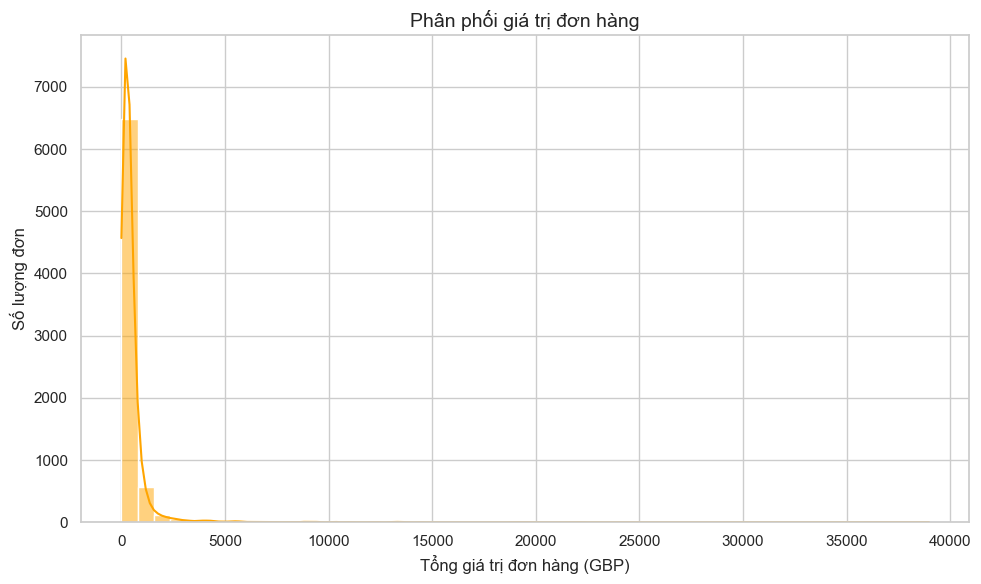

In [42]:
# ----- 2. Biểu đồ: Phân phối giá trị đơn hàng -----
order_values = df.groupby("InvoiceNo")["TotalPrice"].sum()

plt.figure(figsize=(10, 6))
sns.histplot(order_values, bins=50, kde=True, color='orange')
plt.title("Phân phối giá trị đơn hàng", fontsize=14)
plt.xlabel("Tổng giá trị đơn hàng (GBP)")
plt.ylabel("Số lượng đơn")
plt.tight_layout()
plt.show()

In [ ]:
#Số lượng đơn hàng theo quốc gia
orders_by_country = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
orders_by_country.plot(kind='bar', color='lightgreen')
plt.title('Top 10 quốc gia theo số lượng đơn hàng')
plt.ylabel('Số đơn hàng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Doanh thu theo tháng
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

df['Revenue'] = df['Quantity'] * df['UnitPrice']
monthly_revenue = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(marker='o')
plt.title('Doanh thu theo tháng')
plt.ylabel('Doanh thu')
plt.xlabel('Tháng')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Phân phối giá sản phẩm
plt.figure(figsize=(8,5))
df['UnitPrice'].clip(upper=50).hist(bins=30, color='salmon')  # Giới hạn để tránh outlier
plt.title('Phân phối giá sản phẩm (UnitPrice ≤ 50)')
plt.xlabel('Unit Price')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

In [43]:
#Import data
df = pd.read_csv('/Users/hoangvupham/Desktop/KHDL mar/Data_G5_Cleaned.csv')
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,171999,551515,21731,RED TOADSTOOL LED NIGHT LIGHT,12,2011-05-01 10:51:00,1.65,15606.0,United Kingdom
1,172000,551515,20749,ASSORTED COLOUR MINI CASES,12,2011-05-01 10:51:00,6.35,15606.0,United Kingdom
2,172001,551515,22729,ALARM CLOCK BAKELIKE ORANGE,8,2011-05-01 10:51:00,3.75,15606.0,United Kingdom
3,172002,551515,22998,TRAVEL CARD WALLET KEEP CALM,24,2011-05-01 10:51:00,0.42,15606.0,United Kingdom
4,172003,551515,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,24,2011-05-01 10:51:00,2.55,15606.0,United Kingdom


In [44]:
#Xay dung customer_item_matrix
customer_item_matrix = df.pivot_table(
 index='CustomerID', 
columns='StockCode', 
values='Quantity',
 aggfunc='sum'
 )
customer_item_matrix.head()

#Chuan hoa ma tran ve 0/1 (0 neu san pham i khong duoc mua boi khach hang j, 1 neu nguoc lai)
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.head()


/var/folders/q_/7yj89v297cv8_gq1jyq7x2sw0000gn/T/ipykernel_92043/281231350.py:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



StockCode,10080,10120,10124G,10125,10133,10135,11001,15030,15034,15036,...,90214N,90214P,90214V,90214Y,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12353.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12355.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#User_based
#Xay dung ma tran cosine similarity giua cac khach hang
user_user_sim_matrix = pd.DataFrame(
 cosine_similarity(customer_item_matrix)
 )

#rename index va ten cot theo customer_ID
user_user_sim_matrix.columns = customer_item_matrix.index
user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')

user_user_sim_matrix.head()

CustomerID,12347.0,12348.0,12352.0,12353.0,12355.0,12358.0,12359.0,12360.0,12362.0,12363.0,...,18263.0,18265.0,18268.0,18272.0,18273.0,18278.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,1.000000,0.000000,0.033005,0.000000,0.047565,0.000000,0.200125,0.021607,0.135066,0.0,...,0.0,0.155126,0.0,0.024254,0.0,0.057166,0.0,0.0,0.080312,0.000000
12348.0,0.000000,1.000000,0.111111,0.000000,0.160128,0.166667,0.000000,0.072739,0.064957,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.054074,0.111111
12352.0,0.033005,0.111111,1.000000,0.000000,0.053376,0.055556,0.112287,0.024246,0.108262,0.0,...,0.0,0.174078,0.0,0.190516,0.0,0.000000,0.0,0.0,0.018025,0.000000
12353.0,0.000000,0.000000,0.000000,1.000000,0.138675,0.144338,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
12355.0,0.047565,0.160128,0.053376,0.138675,1.000000,0.000000,0.080911,0.034943,0.062409,0.0,...,0.0,0.041812,0.0,0.000000,0.0,0.000000,0.0,0.0,0.025976,0.106752


In [46]:
#Item_based
#Tinh ma tran cosine_similarity giua cac item
item_item_sim_matrix = pd.DataFrame(
 cosine_similarity(customer_item_matrix.T)
 )
item_item_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3094,3095,3096,3097,3098,3099,3100,3101,3102,3103
0,1.000000,0.000000,0.0,0.000000,0.033501,0.000000,0.000000,0.0,0.047088,0.026650,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0.000000,1.000000,0.0,0.000000,0.037037,0.065372,0.069505,0.0,0.104116,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.083333,0.0,0.000000
2,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0.000000,0.000000,0.0,1.000000,0.024246,0.000000,0.000000,0.0,0.000000,0.038576,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.054554,0.0,0.030045
4,0.033501,0.037037,0.0,0.024246,1.000000,0.217907,0.046337,0.0,0.069411,0.049105,...,0.0,0.0,0.0,0.0,0.0,0.059391,0.0,0.041667,0.0,0.022948


In [47]:
#rename index va ten cot theo stock_code
item_item_sim_matrix.columns = customer_item_matrix.T.index
item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')
item_item_sim_matrix.head()

StockCode,10080,10120,10124G,10125,10133,10135,11001,15030,15034,15036,...,90214N,90214P,90214V,90214Y,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10080,1.000000,0.000000,0.0,0.000000,0.033501,0.000000,0.000000,0.0,0.047088,0.026650,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10120,0.000000,1.000000,0.0,0.000000,0.037037,0.065372,0.069505,0.0,0.104116,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.083333,0.0,0.000000
10124G,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10125,0.000000,0.000000,0.0,1.000000,0.024246,0.000000,0.000000,0.0,0.000000,0.038576,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.054554,0.0,0.030045
10133,0.033501,0.037037,0.0,0.024246,1.000000,0.217907,0.046337,0.0,0.069411,0.049105,...,0.0,0.0,0.0,0.0,0.0,0.059391,0.0,0.041667,0.0,0.022948


In [48]:
# ====== 1. Chuyển về numpy ======
user_item_np = customer_item_matrix.to_numpy()
user_sim_np = user_user_sim_matrix.to_numpy()
item_sim_np = item_item_sim_matrix.to_numpy()

user_ids = customer_item_matrix.index
item_ids = customer_item_matrix.columns

k = 5  # Số lượng hàng xóm gần nhất

# ====== 2. User-based top-k weighted score ======
topk_user_sim = np.zeros_like(user_sim_np)
for i in range(user_sim_np.shape[0]):
    top_k_idx = np.argsort(-user_sim_np[i])[:k+1]
    top_k_idx = top_k_idx[top_k_idx != i]  # Loại chính nó
    topk_user_sim[i, top_k_idx] = user_sim_np[i, top_k_idx]

user_based_score_np = np.dot(topk_user_sim, user_item_np)
user_sim_sums = np.sum(topk_user_sim, axis=1).reshape(-1, 1)
user_based_score_np = np.divide(user_based_score_np, user_sim_sums, where=user_sim_sums != 0)

# ====== 3. Item-based top-k weighted score ======
topk_item_sim = np.zeros_like(item_sim_np)
for i in range(item_sim_np.shape[0]):
    top_k_idx = np.argsort(-item_sim_np[i])[:k+1]
    top_k_idx = top_k_idx[top_k_idx != i]  # Loại chính nó
    topk_item_sim[i, top_k_idx] = item_sim_np[i, top_k_idx]

item_based_score_np = np.dot(user_item_np, topk_item_sim)
item_sim_sums = np.sum(topk_item_sim, axis=1).reshape(1, -1)
item_based_score_np = np.divide(item_based_score_np, item_sim_sums, where=item_sim_sums != 0)

# ====== 4. Chuyển lại về DataFrame ======
user_based_score = pd.DataFrame(user_based_score_np, index=user_ids, columns=item_ids)
item_based_score = pd.DataFrame(item_based_score_np, index=user_ids, columns=item_ids)

# ====== 5. Loại bỏ sản phẩm đã mua ======
user_based_score[customer_item_matrix > 0] = 0
item_based_score[customer_item_matrix > 0] = 0


In [49]:
user_based_score

StockCode,10080,10120,10124G,10125,10133,10135,11001,15030,15034,15036,...,90214N,90214P,90214V,90214Y,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192842,0.0,0.000000
12348.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
12352.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
12353.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.165958
12355.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18278.0,0.0,0.0,0.0,0.0,0.0,0.199319,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
18281.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.393343
18282.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [50]:
item_based_score

StockCode,10080,10120,10124G,10125,10133,10135,11001,15030,15034,15036,...,90214N,90214P,90214V,90214Y,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191184,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
12353.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
12355.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152147,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18278.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [51]:
def recommend_top_5_distinct(user_id, top_n_each=5):
    if user_id not in customer_item_matrix.index:
        return {'user_based': [], 'item_based': []}

    # Lấy top_n_each từ user-based
    top_user = user_based_score.loc[user_id].sort_values(ascending=False).head(top_n_each).index.tolist()

    # Lấy top_n_each từ item-based, loại bỏ trùng với user-based
    item_scores = item_based_score.loc[user_id].drop(index=top_user, errors='ignore')
    top_item = item_scores.sort_values(ascending=False).head(top_n_each).index.tolist()

    # Nếu item-based sau khi loại trùng còn ít hơn 5 → bổ sung từ toàn bộ danh sách
    if len(top_item) < top_n_each:
        remaining = top_n_each - len(top_item)
        all_items = item_based_score.columns.difference(top_user + top_item)
        filler = item_based_score.loc[user_id, all_items].sort_values(ascending=False).head(remaining).index.tolist()
        top_item += filler

    return {
        'user_based': top_user,
        'item_based': top_item
    }

def print_recommendations_distinct(user_id, df, top_n_each=5):
    if user_id not in customer_item_matrix.index:
        print(f"⚠️ Khách hàng '{user_id}' không tồn tại trong dữ liệu. Vui lòng kiểm tra lại.")
        return

    recs = recommend_top_5_distinct(user_id, top_n_each)

    print(f"\n📌 Gợi ý cho khách hàng {user_id} (không trùng sản phẩm):")

    print("\n🔵 User-based:")
    for code in recs['user_based']:
        desc = df[df['StockCode'] == code]['Description'].dropna().unique()
        name = desc[0] if len(desc) > 0 else 'Unknown'
        print(f"  - {code}: {name}")

    print("\n🟢 Item-based:")
    for code in recs['item_based']:
        desc = df[df['StockCode'] == code]['Description'].dropna().unique()
        name = desc[0] if len(desc) > 0 else 'Unknown'
        print(f"  - {code}: {name}")


In [52]:
print_recommendations_distinct(17935,df)


📌 Gợi ý cho khách hàng 17935 (không trùng sản phẩm):

🔵 User-based:
  - 22383: LUNCH BAG SUKI DESIGN 
  - 21770: OPEN CLOSED METAL SIGN
  - 22662: LUNCH BAG DOLLY GIRL DESIGN
  - 22382: LUNCH BAG SPACEBOY DESIGN 
  - 85099C: JUMBO  BAG BAROQUE BLACK WHITE

🟢 Item-based:
  - 22554: PLASTERS IN TIN WOODLAND ANIMALS
  - 22757: LARGE RED BABUSHKA NOTEBOOK 
  - 22758: LARGE PURPLE BABUSHKA NOTEBOOK  
  - 20996: JAZZ HEARTS ADDRESS BOOK
  - 22555: PLASTERS IN TIN STRONGMAN


In [53]:

import networkx as nx
import plotly.graph_objects as go


In [54]:
#Biểu đồ mạng dựa trên item-item matrix
# Tạo đồ thị
G = nx.Graph()
threshold = 0.5

# Duyệt qua ma trận similarity
for i in item_item_sim_matrix.index:
    G.add_node(i)
    for j in item_item_sim_matrix.columns:
        if i != j and item_item_sim_matrix.loc[i, j] > threshold:
            G.add_edge(i, j, weight=item_item_sim_matrix.loc[i, j])

# Layout
pos = nx.spring_layout(G, seed=42)

# Cạnh
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Hàm lấy mô tả sản phẩm
desc_dict = df.set_index('StockCode')['Description'].to_dict()

# Nút
node_x, node_y, hover_texts = [], [], []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    # Lấy mô tả sản phẩm
    desc = desc_dict.get(node, 'Không rõ mô tả')

    # Lấy các sản phẩm tương tự gần nhất
    similar_items = item_item_sim_matrix.loc[node].sort_values(ascending=False)
    similar_items = similar_items[similar_items.index != node]
    top_similar = similar_items.head(3).index.tolist()
    
    # Thêm mô tả cho hover
    similar_desc = [f"{code} - {desc_dict.get(code, 'Không rõ')}" for code in top_similar]
    hover_text = f"<b>{node}</b>: {desc}<br>Gần giống với:<br>" + "<br>".join(similar_desc)
    hover_texts.append(hover_text)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=hover_texts,
    marker=dict(size=10, color='blue', line_width=2)
)

# Biểu đồ
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=dict(text='Biểu đồ mạng sản phẩm (Cosine Similarity)', font=dict(size=16)),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
               )

# Xuất ra HTML
fig.write_html("network_graph.html")